# Credit Card Approval Prediction

#### Project Overview

A bank's credit card department is one of the top adopters of data science. A top focus for the bank has been acquring new credit card customers. Giving out credit cards without doing proper research or evaluating applicant's creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for maany years, and the model is known as an application scoreboard. A credit card application's cutoff value is determined using the application scoreboard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at the given time.

Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaulate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the calliber of credit judgements.


#### Project Objective

The main objective of this assignment is to minimize the risk and maximize the profit of the bank. Bank has to make a decision based on the applicant's profile to minimize the loss from bank's prepective. Bank considers the applicant's over their nature of work, income range and family orientation details to take any decision to approve or reject a credit card application. The customer Credit card data contains many features and a classification approach to identity the credit worthiness of an applicant.

In tihs project we are utilizing the exploratory data analysis (EDA) as a data exploration technique to acquire knowledge, discover new relations, apply new methodologies and unravel patterns in data. It is important to apply the necessary retionale behind each step to address the main objective of the study.

So, the primary objective of this project is to develop a machine learning model for Credit Card Approval Prediction.

|Features||Values|
|--------||------|
|*Ind_ID*||Client ID|
|*Approval_status*||0 is application approved and 1 is application rejected|
|*Gender*||Gender Information|
|*Car_owner*||Having a car or not|
|*Propert_owner*||Having a property or not|
|*Children*||Count of children having|
|*Annual_income*||Annual income|
|*Type_income*||Income type|
|*Education*||Education level|
|*Marital_status*||Marital status|
|*Housing_type*||Livingstyle|
|*Birthday_count*||Use backward count from current day (0), -1 means yesterday|
|*Employed_days*||Start date of employment. Use backward count from current day (0). Postive value means, indivisual is        currently unemployed|
|*Mobile_phone*||Any mobile phone|
|*Work_phone*||Any work phone|
|*Phone*||Any phone number|
|*EMAIL_ID*||Any email id|
|*Type_Occupation*||Type of occupation|
|*Family_Members*||Family size|

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ignoring warnings:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Spliting Data into Train and Test
from sklearn.model_selection import train_test_split

**Importing Datasets**

In [3]:
Credit_card = pd.read_csv('Credit_card.csv')
Credit_card_label = pd.read_csv('Credit_card_label.csv')

**Merging both DataFrames using Pandas Merge Function**

In [4]:
data = pd.merge(Credit_card, Credit_card_label, on ='Ind_ID', how='inner')

In [5]:
df = data.copy()

In [6]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5056149,M,Y,N,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-23424.0,-14887,1,0,0,0,Laborers,2,0
1,5090386,F,N,Y,0,247500.0,Commercial associate,Higher education,Single / not married,House / apartment,-21537.0,-13735,1,0,0,0,Core staff,1,0
2,5033628,F,N,Y,0,166500.0,State servant,Higher education,Married,House / apartment,-23599.0,-13382,1,0,0,0,NaN,2,0
3,5126108,F,N,Y,0,112500.0,State servant,Secondary / secondary special,Single / not married,House / apartment,-20577.0,-13010,1,1,0,0,Core staff,1,0
4,5112599,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466.0,-12870,1,1,1,0,Managers,2,0


**Shape of our Dataset**

In [7]:
df.shape
print('Total No.of Rows in Dataset:',data.shape[0])
print('Total No.of Columns in Dataset:',data.shape[1])

Total No.of Rows in Dataset: 1548
Total No.of Columns in Dataset: 19


## Data Exploration

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

**We can gather valuable information about the dataset:**
- The dataset contains 1,548 entries(rows) & there are 19 columns in the dataset.
- Out of 19, these 8 coulmns are Categorical and 11 are Numerical columns.
- Several columns have missing values, including GENDER, Annual_income, Birthday_count and Type_Occupation


## Categorical Columns in Dataset

In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns
for i in categorical_columns:
    print(i)

GENDER
Car_Owner
Propert_Owner
Type_Income
EDUCATION
Marital_status
Housing_type
Type_Occupation


In [10]:
numerical_columns = df.select_dtypes(include='number')
for i in numerical_columns:
    print(i)

Ind_ID
CHILDREN
Annual_income
Birthday_count
Employed_days
Mobile_phone
Work_Phone
Phone
EMAIL_ID
Family_Members
label


 ## Checking for missing values

In [11]:
df.isnull().sum()/len(df)*100

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

**Here we can see that**
- GENDER: 0.45% missing values
- Annual_income: 1.49% missing values
- Birthday_count: 1.42% missing values
- Type_Occupation: 31.52% missing values

These columns have missing values in the dataset, and addressing these missing values will be important during data preprocessing and analysis.


## Drop Irrelevant Features

**The Features "Mobile_phone", "Work_phone", "Phone" and "EMAIL_ID" are present in the dataset but are deemed unnecessary for the analysis. Drop these irrelevant features.**

**'Type_Occupation' has a lot of missing values, around 31.525 which is why we consider removing it.**

In [12]:
df = df.drop(columns=["Mobile_phone","Work_Phone","Phone","EMAIL_ID","Type_Occupation"],axis=1)

In [13]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Family_Members',
       'label'],
      dtype='object')

## Feature Engineering

**Calculate the approx age of customers using "Birthday_count" variable**

In [14]:
import math

Age = []
for i in df['Birthday_count']:
    if not math.isnan(i):  # Check if the value is not NaN
        a = i/365
        Age.append(round(abs(a)))
    else:
        Age.append(np.nan)
        
df['Age'] = Age # Create a new column 'Approx_Age' in the dataframe

**Create an "Employed_Status" Feature from "Employed_days"**

In [15]:
Employed_status = []
for i in df['Employed_days']:
    if i < 0:
        Employed_status.append('Employed')
    else:
        Employed_status.append("Unemployed")
df['Employed_status'] = Employed_status

In [16]:
df = df.drop(columns=['Birthday_count','Employed_days'],axis=1)

In [17]:
df.rename(columns={'label':"Approved_status"},inplace=True)

### Now we have 14 features for Analysis

**Overall Statistics about the Dataset**

In [18]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Family_Members,Approved_status,Age
count,1.548000e+03,1548.000000,1.525000e+03,1548.000000,1548.000000,1526.000000
mean,5.078920e+06,0.412791,1.913993e+05,2.161499,0.113049,43.952818
std,4.171759e+04,0.776691,1.132530e+05,0.947772,0.316755,11.603295
min,5.008827e+06,0.000000,3.375000e+04,1.000000,0.000000,21.000000
25%,5.045070e+06,0.000000,1.215000e+05,2.000000,0.000000,34.000000
50%,5.078842e+06,0.000000,1.665000e+05,2.000000,0.000000,43.000000
75%,5.115673e+06,1.000000,2.250000e+05,3.000000,0.000000,54.000000
max,5.150412e+06,14.000000,1.575000e+06,15.000000,1.000000,68.000000


**Data Summary Report**

- The average annual income is approximately 191,399.30, with an notable standard deviation of 113,253,00, suggesting a       wide income distribution
- The age of indivisuals ranges from 21 to 68 years, with an average age of approximately 43.95 years.
- The dataset contains information on creditcard applicants, with notable variations in annual income,family,size and the   no.of children.
- However, it faces challenges such as missing data and outliers in certain features.**Additionaly, the dataset exhibits class imbalance with a relatively more credit card approval rate**

**To built an effective credit card approval prediction model, thorough data preprocessing, including handling missing values and outliers, as well as careful model selection and evaluation, will be essential to ensure accurate predictions.**

**Check Unique Values in Categorical Columns**

In [19]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Family_Members', 'Approved_status', 'Age',
       'Employed_status'],
      dtype='object')

In [20]:
categorical_column = df.select_dtypes(include=['object']).columns
for i in categorical_column:
    print(f"Unique Values in {i} Feature")
    print(df[i].unique())
    print("---------------------------------------------------------")

Unique Values in GENDER Feature
['M' 'F' nan]
---------------------------------------------------------
Unique Values in Car_Owner Feature
['Y' 'N']
---------------------------------------------------------
Unique Values in Propert_Owner Feature
['N' 'Y']
---------------------------------------------------------
Unique Values in Type_Income Feature
['Working' 'Commercial associate' 'State servant' 'Pensioner']
---------------------------------------------------------
Unique Values in EDUCATION Feature
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Academic degree' 'Lower secondary']
---------------------------------------------------------
Unique Values in Marital_status Feature
['Married' 'Single / not married' 'Separated' 'Civil marriage' 'Widow']
---------------------------------------------------------
Unique Values in Housing_type Feature
['House / apartment' 'Municipal apartment' 'With parents'
 'Co-op apartment' 'Office apartment' 'Rented apartment']
-

**Modifying Categories in Categorical Columns**

In [21]:
# Creating mapping dictionary to replace existing categories
Marital_status_mapping = {
    'Single / not married' : 'not married',
    'Married' : 'Married',
    'Separated' : 'Separated',
    'Civil marriage' : 'Civil marriage',
    'Widow' : 'Widow'
}
# use the map function to apply the mapping to the Marital_status column
df['Marital_status'] = df['Marital_status'].map(Marital_status_mapping)

# Verify the changes
print(df['Marital_status'].unique())

['Married' 'not married' 'Separated' 'Civil marriage' 'Widow']


In [22]:
# Creating mapping dictionary to replace existing categories
education_mapping = {
    'Secondary / secondary special':'Secondary Education',
    'Higher education':'Higher Education',
    'Incomplete higher':'Incomplete Higher',
    'Academic degree':'Academic Degree',
    'Lower secondary':'Lower Seondary'
}
# use the map function to apply the mapping to the Education column
df['EDUCATION'] = df['EDUCATION'].map(education_mapping)

# Verify the changes
print(df['EDUCATION'].unique())

['Secondary Education' 'Higher Education' 'Incomplete Higher'
 'Academic Degree' 'Lower Seondary']


### Visualizing the Dataset for Better Understanding

**Distribution of numerical variables**

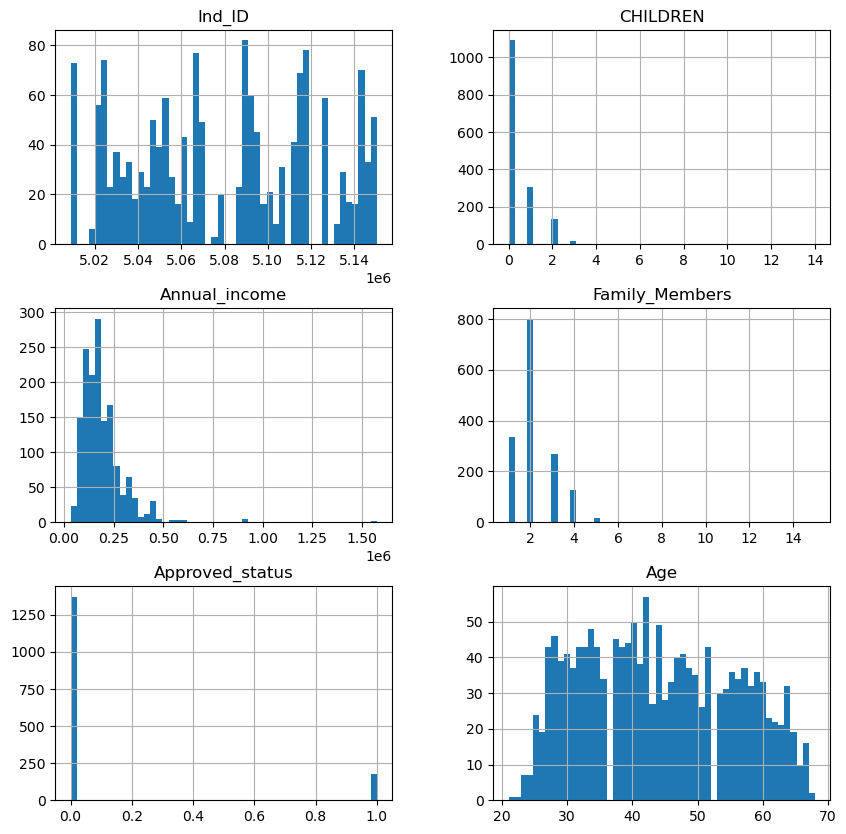

In [23]:
df.hist(bins=50,figsize=(10,10))
plt.show()

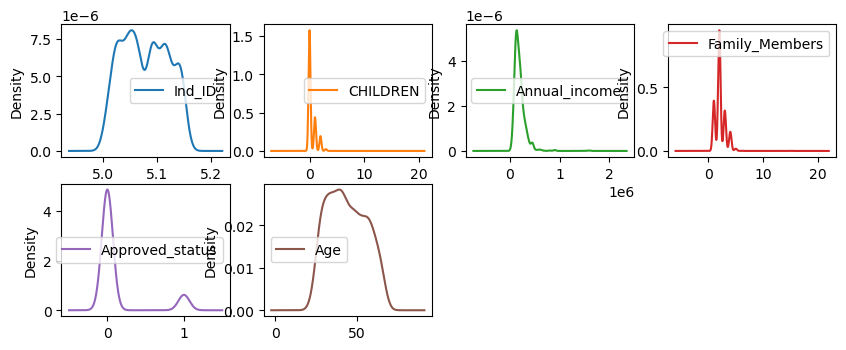

In [24]:
df.plot(kind='density',subplots=True, layout=(5,4), sharex=False, figsize=(10,10))
plt.show()

In [25]:
numerical_columns = df.select_dtypes(include='number')
for i in numerical_columns:
    print(i)

Ind_ID
CHILDREN
Annual_income
Family_Members
Approved_status
Age


## Exploring the Association Between the Target Variable and Input Features

- Customers with no children (0 children) tend to have higher likelihood of credit card approval application.
- Applicants with an annual income b/w 100,000 and 199,000 and ages b/w 25 to 60, are more likely to have their credit card applications approved.
- Households consisting of two family members have a notably higher probabilty of credit card application approval 

When considering all these factors together (0 children, Income 100-199k, age 25-60 and family size of 2), indivisuals in this category exhibit a singnificantly higher likelihood of credit card application approval.

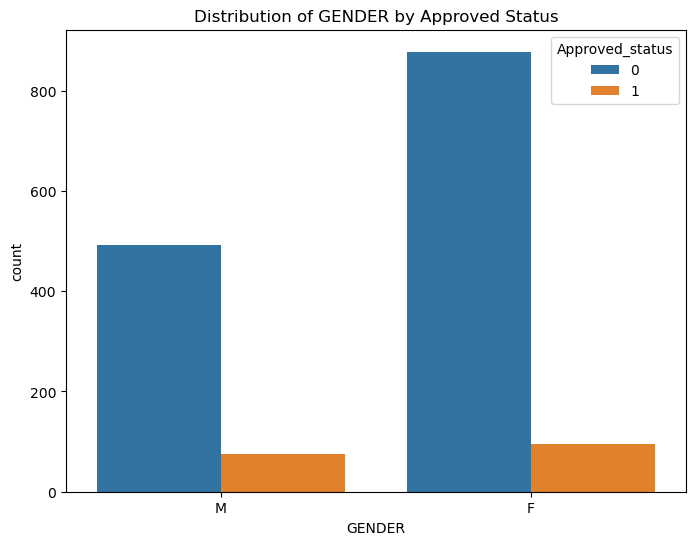

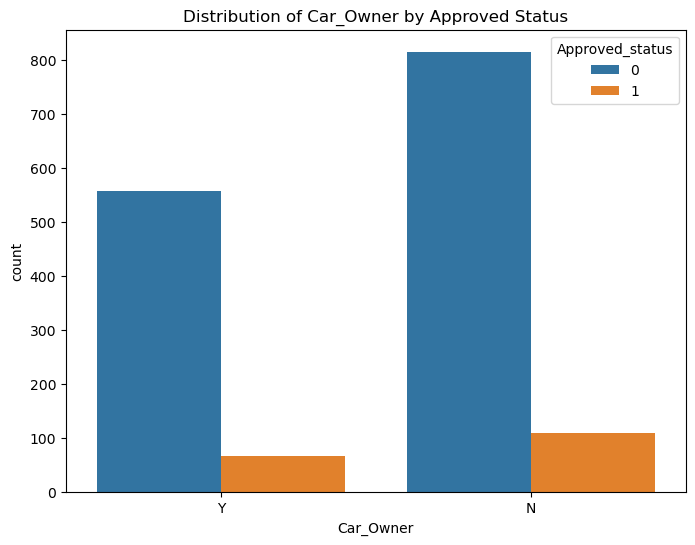

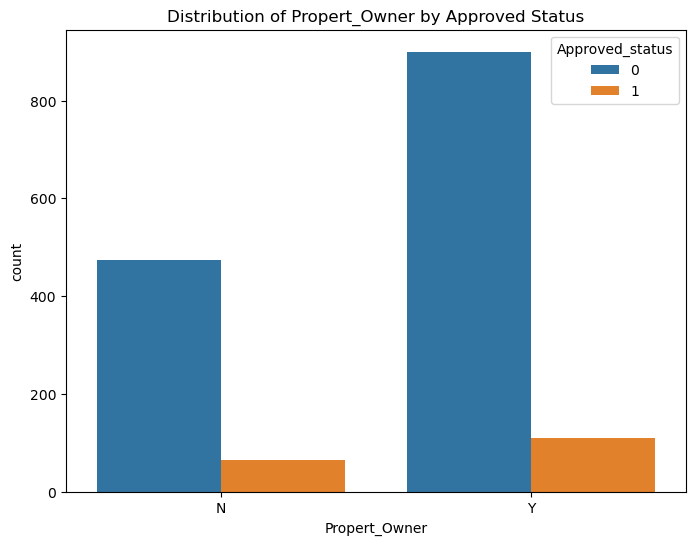

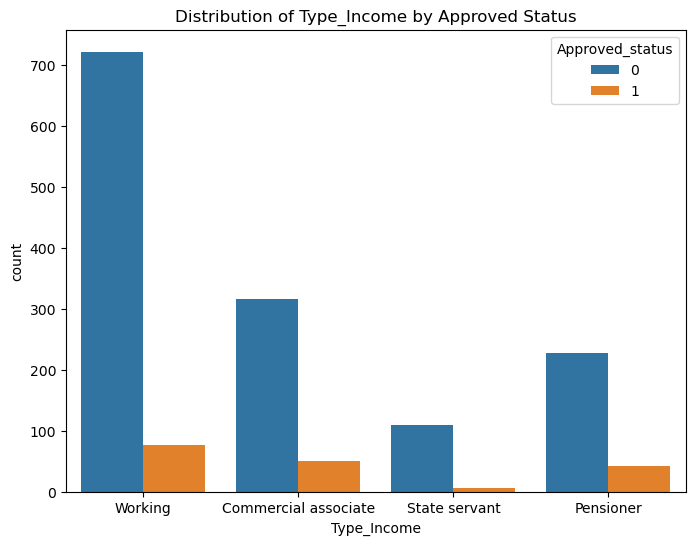

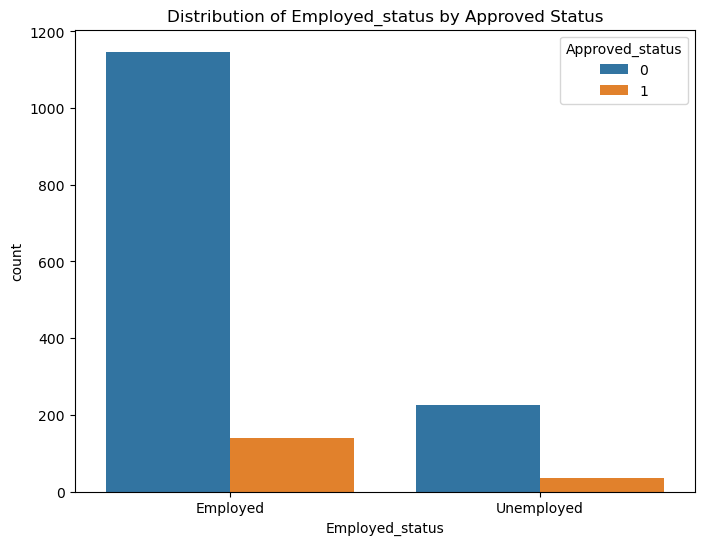

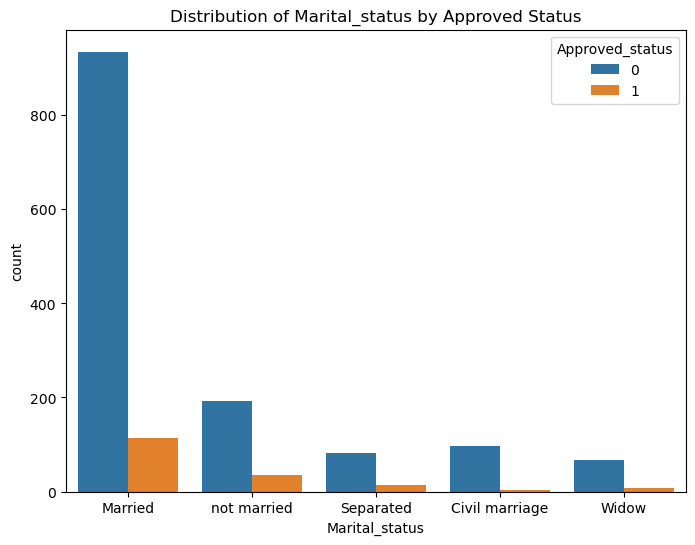

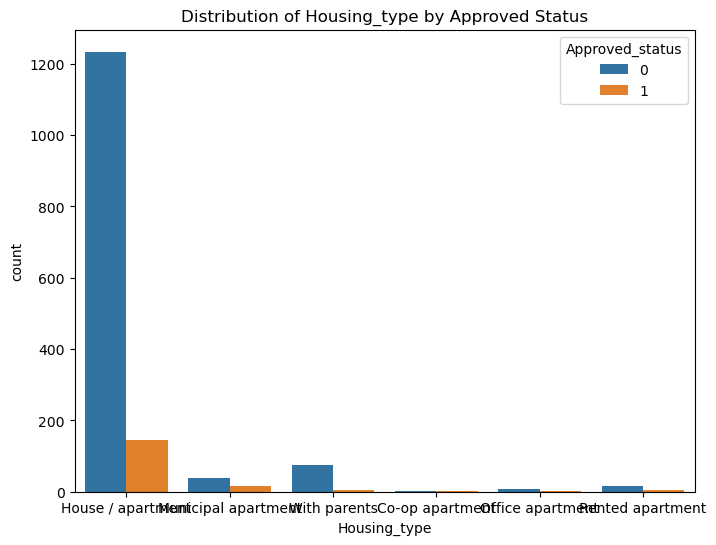

In [26]:
categorical_features = ['GENDER','Car_Owner','Propert_Owner','Type_Income','Employed_status','Marital_status','Housing_type']
for feature in categorical_features:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df,x=feature, hue='Approved_status')
    plt.title(f"Distribution of {feature} by Approved Status")

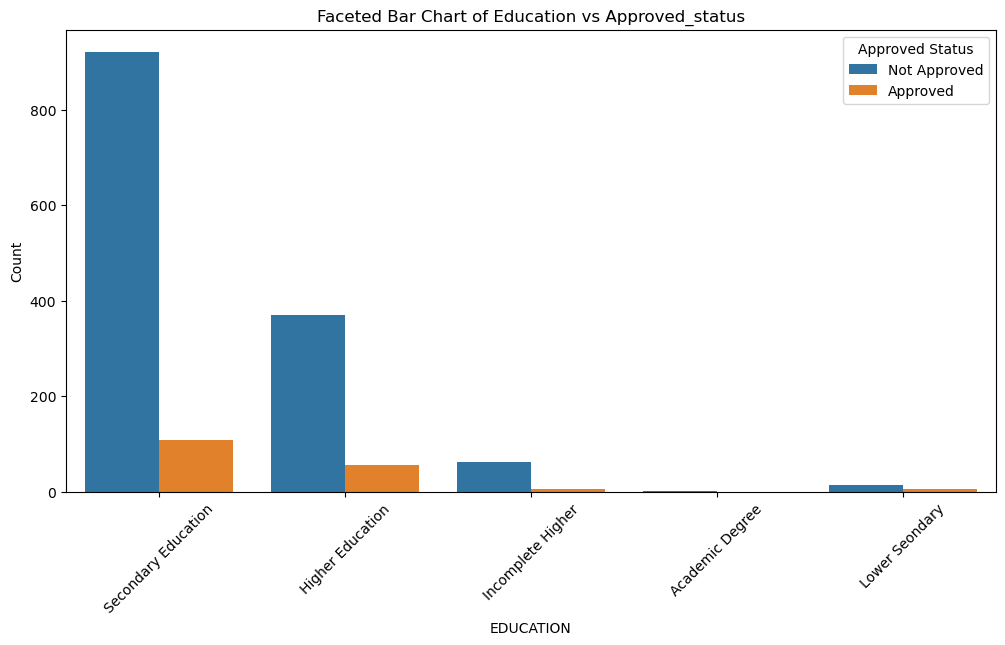

In [27]:
# Create a faceted bar chart for Education vs Approved_status
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='EDUCATION',hue='Approved_status')
plt.title("Faceted Bar Chart of Education vs Approved_status")
plt.xlabel("EDUCATION")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.legend(title='Approved Status',labels=['Not Approved','Approved'])
plt.show()

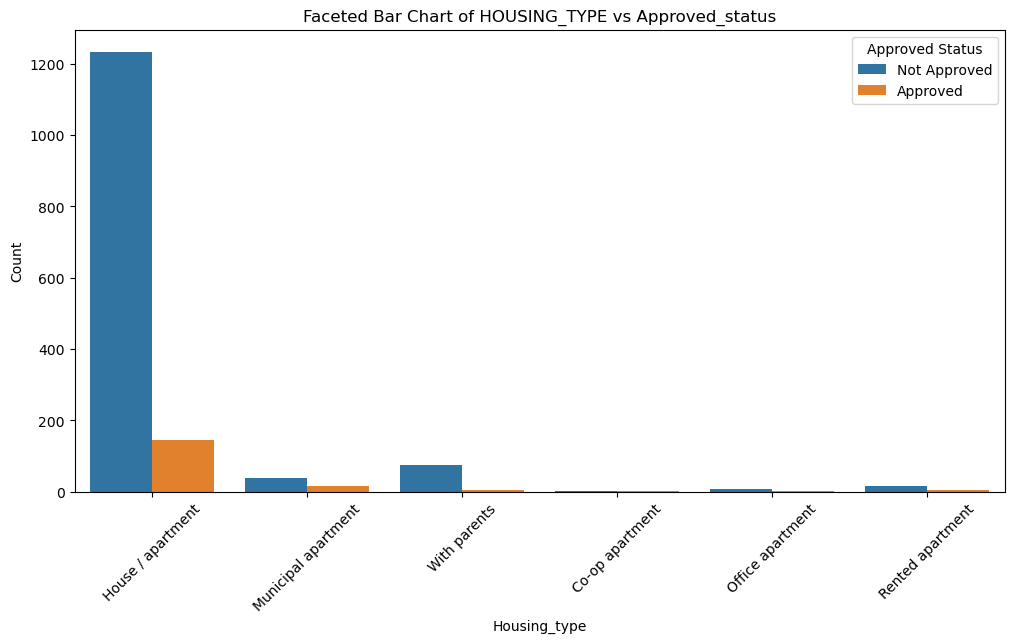

In [28]:
# Create a faceted bar chart for Housing_type vs Approved_status
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Housing_type',hue='Approved_status')
plt.title("Faceted Bar Chart of HOUSING_TYPE vs Approved_status")
plt.xlabel("Housing_type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Approved Status',labels=['Not Approved','Approved'])
plt.show()

## Key Findings:

### Income Type( Working)

Customers with a 'working' Income type tand to have higher likelihood of their applications being approved compared to other income types.

### Marital Status (Married)

Married customers are more likely to have their applications approved in comparison to unmarried indivisuals.

### Housing Type ('House/Apartment')

Customers residing in 'house/apartment' type housing are more likely to see their applications approved when compared to those with different housing arrangements.

### Combined Influence

When considering all three factors together, indivisuals who are 'working',married and live in 'house/apartment' type housing exhibit a notably higher probability of having their loan applications approved.

**Boxplot to Check Outliers in Dataset**

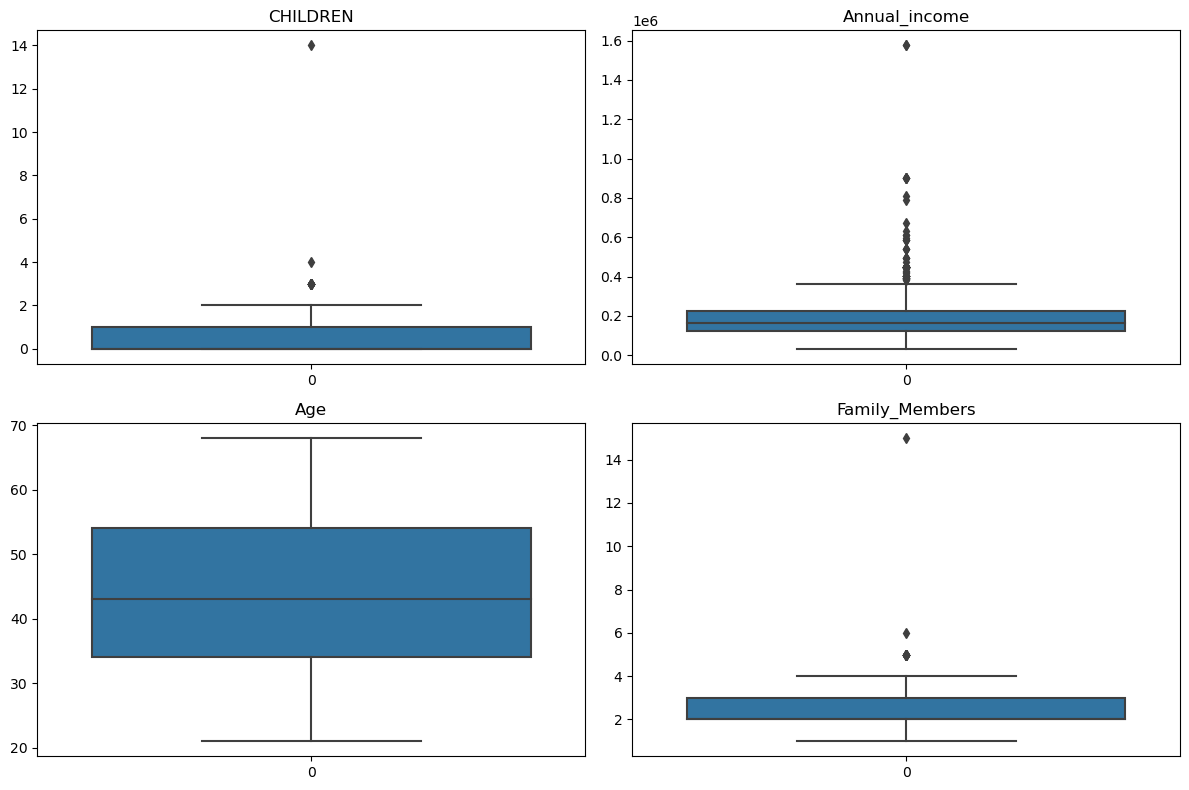

In [29]:
# Columns to create boxplots for
columns_to_plot = ['CHILDREN','Annual_income','Age','Family_Members']

# Create a list of different colors
colors = ['blue','green','red','purple']

# Create subplots
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8))

# Iterate through columns and create boxplots with different colors
for i, columns in enumerate(columns_to_plot):
    sns.boxplot(data=df[columns], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(columns)
    
plt.tight_layout()
plt.show()

**So, the dataset contains outliers in features like 'Annual_income', 'CHILDREN' and 'Family_members'**

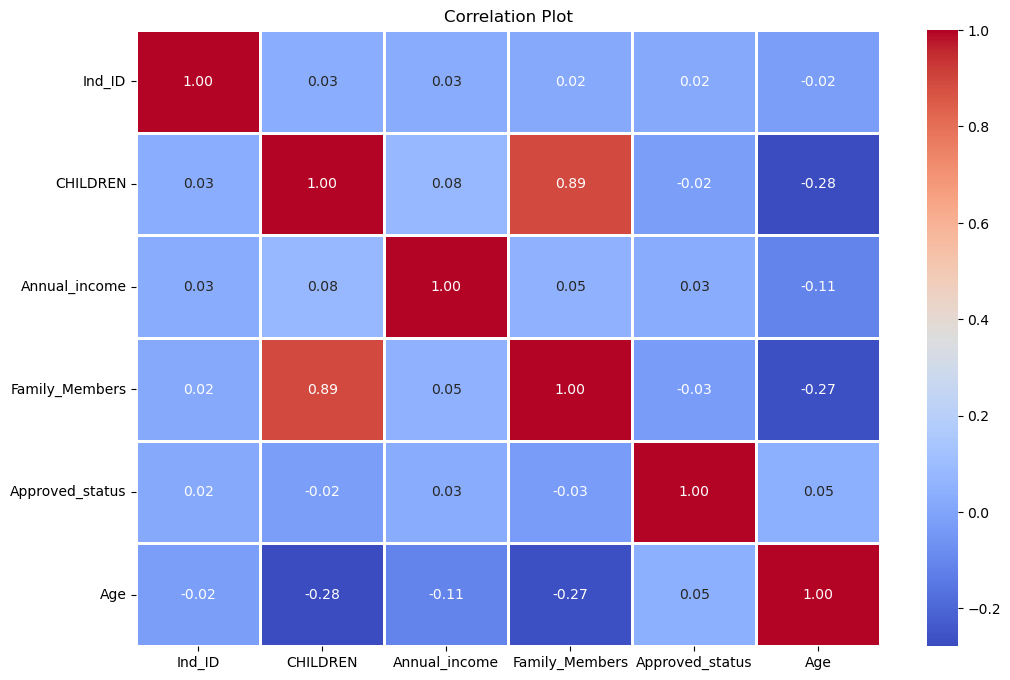

In [30]:
# Compute the correlation matirx
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=1)
plt.title("Correlation Plot")
plt.show()

#### It has been shown that there is a strong correlation bw family size and the no.of children in the family.

#### These pbservations highlight the need for data preprocessing, addressing missing values, handling outliers and addressing class imbalance before building machine learning models.

### Data Preprocessing

**Handle Missing Values**

In [31]:
df.isnull().sum()

Ind_ID              0
GENDER              7
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income      23
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Family_Members      0
Approved_status     0
Age                22
Employed_status     0
dtype: int64

In [32]:
df['GENDER'] = df['GENDER'].fillna(df['GENDER'].mode()[0])
df['Annual_income'] = df['Annual_income'].fillna(df['Annual_income'].median())
df['Age'] = df['Age'].fillna(df['Age'].mean())

**Handle Outlier in Dataset**

In [33]:
Q1 = df['Annual_income'].quantile(0.25)
Q3 = df['Annual_income'].quantile(0.75)

IQR = Q3 - Q1

upper_l = Q3 + (1.5 * IQR)
lower_l = Q1 - (1.5 * IQR)

df['Annual_income'] = df['Annual_income'].clip(lower=lower_l,upper=upper_l)

#### Save the clean data

In [34]:
df.to_excel("Credit_cards_cleaned.xlsx", index=False)

In [35]:
df = df.drop(columns=['Ind_ID'])

In [36]:
df.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Family_Members', 'Approved_status', 'Age', 'Employed_status'],
      dtype='object')

## Feature Encoding:

In [37]:
categorical_column = []
for i in df.columns:
    if df[i].dtypes == 'object':
        categorical_column.append(i)
        
categorical_column

['GENDER',
 'Car_Owner',
 'Propert_Owner',
 'Type_Income',
 'EDUCATION',
 'Marital_status',
 'Housing_type',
 'Employed_status']

**Dummy Encoding**

In [38]:
X = pd.get_dummies(df, columns=categorical_column, drop_first=True)

### Seperate Independent Variable(X) and Dependent Variable (y)

In [39]:
X = X.drop("Approved_status", 1)
y = df['Approved_status']

### Split the data into training and testing sets

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
print(len(X_train))
print(len(X_test))

1238
310


### Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modelling 


### LOGISITC REGRESSION: 

In [43]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=16)
log.fit(X_train,y_train)

# Prediction
log_pred_train = log.predict(X_train)
log_pred_test = log.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
log_train_accuracy = accuracy_score(y_train,log_pred_train)*100
log_test_accuracy = accuracy_score(y_test,log_pred_test)*100

from sklearn.model_selection import cross_val_score
log_cv = cross_val_score(log,X_test,y_test,scoring='accuracy').mean()*100

print(f"Train Accuracy: {log_train_accuracy:.2f}%")
print(f"Test Accuracy: {log_test_accuracy:.2f}%")
print(f"Cross Validation Score: {log_cv:.2f}%")

Train Accuracy: 89.34%
Test Accuracy: 86.77%
Cross Validation Score: 88.06%


**SVM Hyperparamter Tuning**

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

sv_model = SVC()

param_grid = {'C':[0.1,1,10,100],
              'gamma':[1,0.1,0.01,0.001],
              'kernel':['rbf','poly','sigmoid']}
grid = GridSearchCV(estimator=sv_model, param_grid=param_grid,cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


### SUPPORT VECTOR MACHINE

In [45]:
from sklearn.svm import SVC
svc_model = SVC(C=1,gamma=1,kernel='rbf',random_state=15)
svc_model.fit(X_train, y_train)

# Prediction
svc_pred_train = svc_model.predict(X_train)
svc_pred_test = svc_model.predict(X_test)

# Evaluation
svc_train_accuracy = accuracy_score(y_train,svc_pred_train)*100
svc_test_accuracy = accuracy_score(y_test,svc_pred_test)*100

svc_cv = cross_val_score(svc_model,X_test,y_test,scoring='accuracy').mean()*100

print(f"Train Accuracy: {svc_train_accuracy:.2f}%")
print(f"Test Accuracy: {svc_test_accuracy:.2f}%")
print(f"Cross Validation Score: {svc_cv:.2f}%")

Train Accuracy: 94.99%
Test Accuracy: 89.35%
Cross Validation Score: 86.13%


**DecisionTree Hyperparamter Tuning**

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier(random_state=15)

param_grid = {'criterion':['gini','entropy'],
              'max_depth':list(range(1,16))}
grid = GridSearchCV(estimator,param_grid,cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 2}


### DECISION TREE:

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt_model =  DecisionTreeClassifier(criterion = 'gini',max_depth=2,random_state=15)
dt_model.fit(X_train, y_train)

# Prediction
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)

# Evaluation
dt_train_accuracy = accuracy_score(y_train,dt_pred_train)*100
dt_test_accuracy = accuracy_score(y_test,dt_pred_test)*100

dt_cv = cross_val_score(dt_model,X_test,y_test,scoring='accuracy').mean()*100

print(f"Train Accuracy: {dt_train_accuracy:.2f}%")
print(f"Test Accuracy: {dt_test_accuracy:.2f}%")
print(f"Cross Validation Score: {dt_cv:.2f}%")

Train Accuracy: 89.42%
Test Accuracy: 87.10%
Cross Validation Score: 87.10%


**RF Hyperparamter Tuning**

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier()

param_grid = {'n_estimators':[100,200,300,400,500],'bootstrap':[True, False]}
grid = GridSearchCV(estimator,param_grid,cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': True, 'n_estimators': 100}


### RANDOM FOREST

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=400,bootstrap=True,random_state=15)
rf_model.fit(X_train,y_train)

# Prediction
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)

# Evaluation
rf_train_accuracy = accuracy_score(y_train,rf_pred_train)*100
rf_test_accuracy = accuracy_score(y_test,rf_pred_test)*100

rf_cv = cross_val_score(rf_model,X_test,y_test,scoring='accuracy').mean()*100

print(f"Train Accuracy: {rf_train_accuracy:.2f}%")
print(f"Test Accuracy: {rf_test_accuracy:.2f}%")
print(f"Cross Validation Score: {rf_cv:.2f}%")

Train Accuracy: 99.43%
Test Accuracy: 91.94%
Cross Validation Score: 86.13%


**XGB Hyperparamter Tuning**

In [50]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier()

param_grid = {'n_estimators':[100,200,300,400,500],
              'max_depth':[None, 10, 20, 30, 40, 50],
               'learning_rate':[0.1,0.01,0.001]}
grid = GridSearchCV(estimator,param_grid,cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}


### XGBOOST:

In [51]:
from xgboost import XGBClassifier
xg_model = XGBClassifier(learning_rate=0.1, max_depth=10, n_estimators=200)
xg_model.fit(X_train,y_train)

# Prediction
xg_pred_train = xg_model.predict(X_train)
xg_pred_test = xg_model.predict(X_test)

# Evaluation
xg_train_accuracy = accuracy_score(y_train,xg_pred_train)*100
xg_test_accuracy = accuracy_score(y_test,xg_pred_test)*100

xg_cv = cross_val_score(xg_model,X_test,y_test,scoring='accuracy').mean()*100

print(f"Train Accuracy: {xg_train_accuracy:.2f}%")
print(f"Test Accuracy: {xg_test_accuracy:.2f}%")
print(f"Cross Validation Score: {xg_cv:.2f}%")

Train Accuracy: 99.35%
Test Accuracy: 91.61%
Cross Validation Score: 86.13%


## Model Selection:

In [52]:
final_data = pd.DataFrame({"Models":['Logistic','SVM','DT','RF','XGBOOST'],
                          "TRAIN_ACC_SCORE":[log_train_accuracy,
                                            svc_train_accuracy,
                                            dt_train_accuracy,
                                            rf_train_accuracy,
                                            xg_train_accuracy],
                          "TEST_ACC_SCORE":[log_test_accuracy,
                                            svc_test_accuracy,
                                            dt_test_accuracy,
                                            rf_test_accuracy,
                                            xg_test_accuracy],
                          "CV_SCORE":[log_cv,
                                     svc_cv,
                                     dt_cv,
                                     rf_cv,
                                     xg_cv]})

In [53]:
final_data

,Models,TRAIN_ACC_SCORE,TEST_ACC_SCORE,CV_SCORE
0,Logistic,89.337641,86.774194,88.064516
1,SVM,94.991922,89.354839,86.129032
2,DT,89.418417,87.096774,87.096774
3,RF,99.434572,91.935484,86.129032
4,XGBOOST,99.353796,91.612903,86.129032
